In [16]:
import numpy as np
from collections import namedtuple
import time
import random
import matplotlib.pyplot as plt

In [17]:
class Agent:
    def __init__(self, i=0,j=0):
        self.i=i
        self.j=j
    @property
    def loc(self):
        return(self.i,self.j)
    
    def vmove(self,direction):
        direction=1 if direction>0 else -1
        return Agent(self.i + direction, self.j)
    
    def hmove(self,direction):
        direction=1 if direction>0 else -1
        return Agent(self.i , direction+ self.j) 
    
    def __repr__(self):
        return str(self.loc)

In [18]:
# general maze class defination
class Maze:
  
    # defining a general 4*4 matrix intialised as 0 matrix
    def __init__(self, rows=4,columns=4):
        self.env =np.zeros((rows, columns))
        # mousy is object of Agent class
        self.mousy=Agent(0,0)
     
    def reset(self):
        self.mousy.i = 0
        self.mousy.j = 0

    def state_for_agent(self,a):
        nr,nc=self.env.shape
        return a.i*nc+a.j
        
    def in_bounds(self,i,j):
        nr,nc= self.env.shape
        return i>=0 and i<nr and j>=0 and j<nc
    
    def agent_in_bounds(self,a):
        return self.in_bounds(a.i,a.j)
    
    def agent_dient(self,a):
        return not self.env[a.i,a.j]== -1
    
    def is_valid_new_agent(self,a):
        return self.agent_in_bounds(a) and self.agent_dient(a)
    
    @property
    def all_actions(self):        
        a=self.mousy    
        return [
            a.vmove(1),
            a.vmove(-1),
            a.hmove(1),
            a.hmove(-1),
        ]
       
    def compute_possible_moves(self):
        moves = self.all_actions
        return [(m, ii) for ii,m in enumerate(moves) if self.is_valid_new_agent(m) ]
    
    def do_a_move(self,a):
        assert self.is_valid_new_agent(a),"Mousy can't go there"
        self.mousy=a
        return 10 if self.has_won() else -0.1
        
    def has_won(self):
        a=self.mousy
        return self.env[a.i,a.j]==1
        
    def visualise(self):
        assert self.agent_in_bounds(self.mousy), "mousy is out of bounds"
        ec=self.env.copy()
        mo=self.mousy
        ec[mo.i,mo.j]=6
        print(ec)
        

In [19]:
def show(M):
        ec=M.env.copy()
        mo=M.mousy
        ec[mo.i,mo.j]=0.5
        plt.matshow(ec)
        plt.clim(-1, 1)
        plt.colorbar()
        plt.show()

In [22]:
# A random test maze we are trying to solve
def make_test_maze(s=4): 
    m = Maze(s,s)
    e = m.env
    h, w = e.shape
    e[-1,-1]= 1

    for i in range(len(e)):
        for j in range(len(e[i])):

            if (i == 0 and j == 0) or (i == h-1 and j == w-1):continue
  
            if random.random()<0.3:
                e[i,j]= -1
    return m

#             if i in [0, h-1] and j in [0, w-1]: 
#                 continue

In [23]:
class Qlearning:
    def __init__(self, num_states, num_actions, lr=0.1, discount_factor =0.99):
        self.q = np.zeros((num_states, num_actions))
        self.a = lr
        self.g = discount_factor
    
    def update(self, st, at, rt, st1):
        q = self.q  
        a = self.a
        g = self.g
        #bellman equation
        q[st, at] = (1-a) * q[st, at] + a * (rt + g * np.max(q[st1]))

In [24]:
def main():
    s = int(input("enter the size of maze"))
    q = Qlearning(s**2,4)
    
    go_ahead = False
    
    while not go_ahead:
        M=make_test_maze(s)
#         M.visualise()
        show(M)
        ctu = input ()
        if ctu.lower() == 'n':
            continue
        go_ahead=True
        
        
    
    for i in range(200):
        M.reset()  
        final_score = 0
    
        itr = 0
        while not M.has_won():
            itr += 1
# exploration and exploitation            
            if  random.random()> 0.5  or i < 100:
                moves= M.compute_possible_moves()
                random.shuffle(moves)
                move, move_idx = moves[0]
            else:
                moves = M.all_actions
                s= M.state_for_agent(M.mousy)
                move_idx = np.argmax(q.q[s])
                move = moves[move_idx]

                 
            at = move_idx
            st = M.state_for_agent(M.mousy)
            score = M.do_a_move(move)
            final_score += score 
            rt = score
            st1 = M.state_for_agent(M.mousy)

            q.update(st, at , rt, st1)
            
            #bellman equation
#           q[st, at] = (1-a) * q[st, at] + a * (rt + g * np.max(q[st1]))

#             show(M)        
#             print(q.q)
#             print("\n")
        
        print(f"finished episode with a final score of {final_score} and in {itr} itereations")
    print(q.q)
     
        
    #BEST SOLUTION
    print('\n')
    print("MAZE BEST SOLUTION")
    M.reset()
#     M.visualise()
    show(M)
    while not M.has_won():
        s= M.state_for_agent(M.mousy)
        a_idx = np.argmax(q.q[s])
        M.do_a_move(M.all_actions[a_idx])
        
#         M.visualise()

#         ec=M.env.copy()
#         mo=M.mousy
#         ec[mo.i,mo.j]=0.5
#         plt.matshow(ec)
#         plt.clim(-1, 1)
#         plt.colorbar()
#         plt.show()
        show(M)
        
    M.visualise()


enter the size of maze4


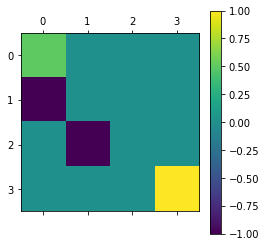

n


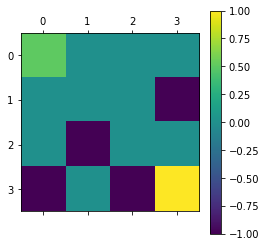

n


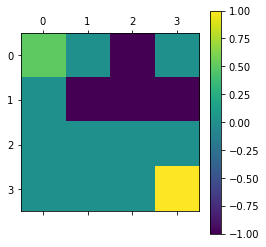

n


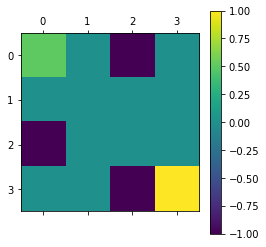

n


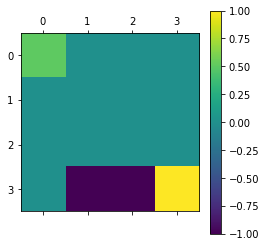

n


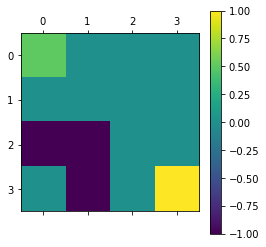

n


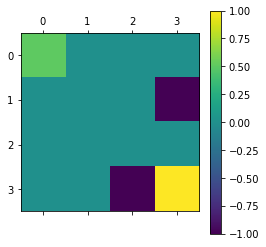

n


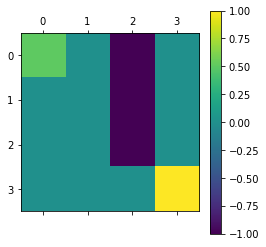

n


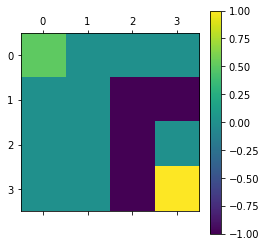

n


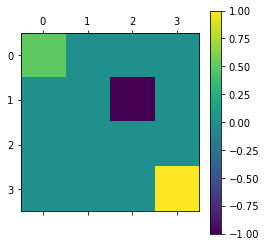

n


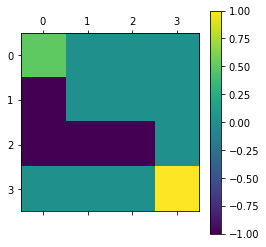

In [ ]:
if __name__=="__main__":
    main()  
